In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# GOALS:
# - Train ourselves on unsupervised deep learning.
# - Train ourselves on the use of autoencoders (AE).
# - Use an AE to estimate latent representations of some numeric data.
# - Use those latent representations to detect anomalies (abnormal data).

In [5]:
# Data set: https://www.kaggle.com/mlg-ulb/creditcardfraud
# https://www.kaggle.com/mlg-ulb/creditcardfraud/download
#
# The datasets contains transactions made by credit cards in September 2013 by european cardholders.
# This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
# The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
#
# It contains only numerical input variables which are the result of a PCA transformation (privacy reasons).
# Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are
# 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
# The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud
# and 0 otherwise.

# Part 1: Load data

In [6]:
from my_path import my_path

In [7]:
# Load data
df = pd.read_csv(my_path + "/creditcard.csv")
print(df.shape)

# Remove rows with nan value-entries
df.dropna(inplace=True)
df.isnull().values.any()

(284807, 31)


False

In [5]:
# Show a summary
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Note classes are not balanced at all
classes_count = pd.value_counts(df['Class'], sort=True)
classes_count

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# summary of class 0 (normal transactions)
df[df.Class==0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# summary of class 1 (abnormal transactions)
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

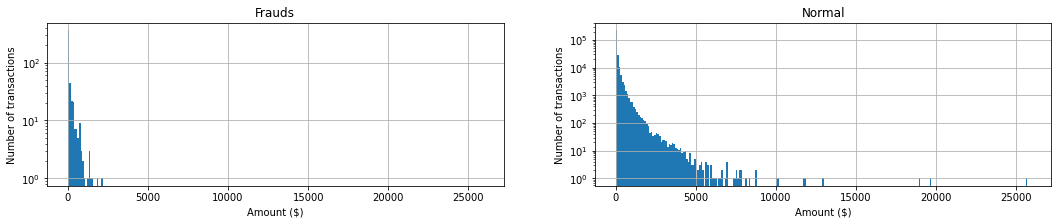

In [ ]:
# Plot amount of normal and abnormal data
plt.figure(figsize=(18, 3))

plt.subplot(1, 2, 1)
plt.title('Frauds')
plt.hist(df[df.Class==1].Amount, bins=range(0, 26000, 100))
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Normal')
plt.hist(df[df.Class==0].Amount, bins=range(0, 26000, 100))
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.grid()

plt.show()

In [ ]:
# Remove time
df = df.drop(['Time'], axis=1)
print(df.shape)

(284807, 30)


In [ ]:
# Extract into matrices values for normal transactions
normal = df[df.Class==0]
normal = normal.drop(['Class'], axis=1)
normal = normal.values
print(normal.shape)

# Extract into matrices values for normal transactions
frauds = df[df.Class==1]
frauds = frauds.drop(['Class'], axis=1)
frauds = frauds.values
print(frauds.shape)

(284315, 29)
(492, 29)


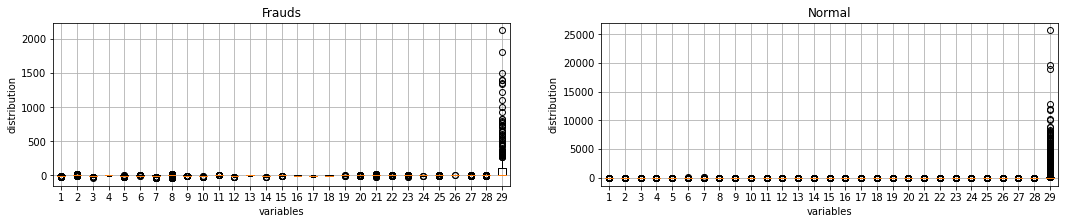

In [ ]:
# Look at the distribution of variables
plt.figure(figsize=(18, 3))

plt.subplot(1, 2, 1)
plt.title('Frauds')
plt.boxplot(frauds)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Normal')
plt.boxplot(normal)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

plt.show()

In [ ]:
# Normalize data
scaler = StandardScaler()
normal = scaler.fit_transform(normal)
frauds = scaler.transform(frauds)

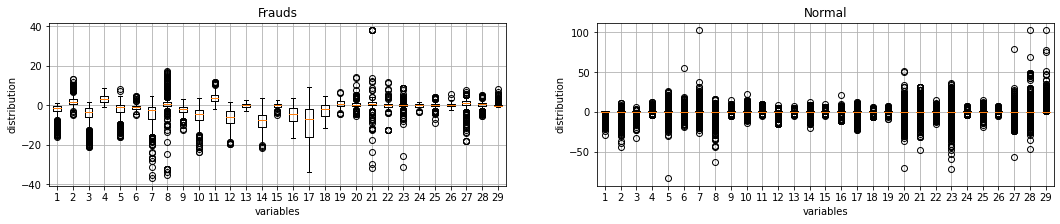

In [ ]:
# Look at the distribution of variables after normalization
plt.figure(figsize=(18, 3))

plt.subplot(1, 2, 1)
plt.title('Frauds')
plt.boxplot(frauds)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Normal')
plt.boxplot(normal)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()

plt.show()

In [ ]:
# Split normal data into training and test data
x_train, x_test = train_test_split(normal, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(255883, 29)
(28432, 29)


# Part 2: Train a model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l1

In [ ]:
# Create model
in_layer = Input(shape=(x_train.shape[1]))

encoder = Dense(1024, activation='relu')(in_layer)
latent  = Dense(16,  activation='relu', name='latent')(encoder)
decoder = Dense(1024, activation='relu')(latent)

out_layer = Dense(x_train.shape[1], activation='linear')(decoder)

AE = Model(inputs=in_layer, outputs=out_layer)
AE.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              30720     
                                                                 
 latent (Dense)              (None, 16)                16400     
                                                                 
 dense_4 (Dense)             (None, 1024)              17408     
                                                                 
 dense_5 (Dense)             (None, 29)                29725     
                                                                 
Total params: 94,253
Trainable params: 94,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and train
AE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = AE.fit(x=x_train, y=x_train, epochs=100, batch_size=128, validation_split=0.1)

Epoch 1/100
1800/1800 [==============================] - 8s 4ms/step - loss: 0.1187 - accuracy: 0.7689 - val_loss: 0.0418 - val_accuracy: 0.8594
Epoch 2/100
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.8590 - val_loss: 0.0314 - val_accuracy: 0.8818
Epoch 3/100
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.8790 - val_loss: 0.0337 - val_accuracy: 0.8779
Epoch 4/100
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0313 - accuracy: 0.8846 - val_loss: 0.0228 - val_accuracy: 0.8959
Epoch 5/100
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.8949 - val_loss: 0.0197 - val_accuracy: 0.9081
Epoch 6/100
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0213 - accuracy: 0.9025 - val_loss: 0.0240 - val_accuracy: 0.8896
Epoch 7/100
1800/1800 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9037 - val_loss: 0.0188 - val_ac

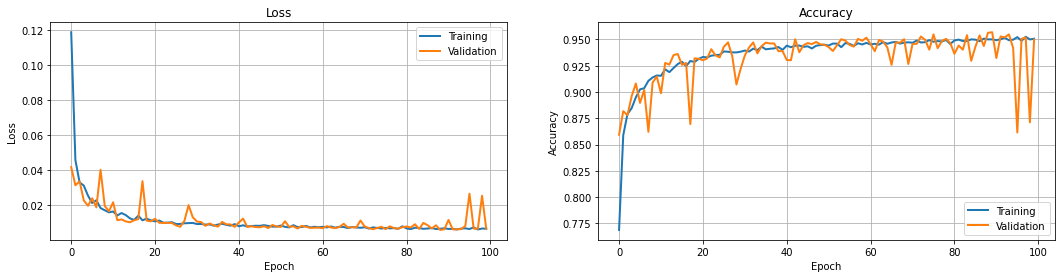

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Train for 20 more epochs with adadelta for better stability
AE.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])
history = AE.fit(x=x_train, y=x_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
1800/1800 [==============================] - 9s 4ms/step - loss: 0.0048 - accuracy: 0.9627 - val_loss: 0.0054 - val_accuracy: 0.9630
Epoch 2/20
1800/1800 [==============================] - 10s 5ms/step - loss: 0.0045 - accuracy: 0.9658 - val_loss: 0.0052 - val_accuracy: 0.9647
Epoch 3/20
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.9669 - val_loss: 0.0052 - val_accuracy: 0.9646
Epoch 4/20
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0043 - accuracy: 0.9674 - val_loss: 0.0051 - val_accuracy: 0.9650
Epoch 5/20
1800/1800 [==============================] - 6s 4ms/step - loss: 0.0043 - accuracy: 0.9676 - val_loss: 0.0051 - val_accuracy: 0.9653
Epoch 6/20
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0043 - accuracy: 0.9678 - val_loss: 0.0051 - val_accuracy: 0.9651
Epoch 7/20
1800/1800 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9680 - val_loss: 0.0050 - val_accuracy

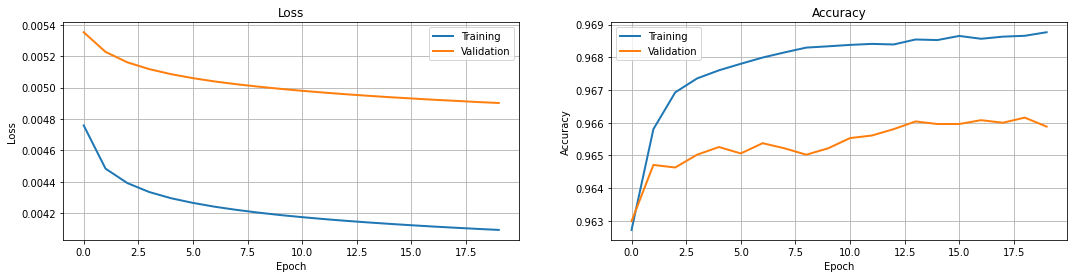

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

# Part 3: Compare reconstruction errors

In [ ]:
# Predict reconstruction error on training data
x_train_hat = AE.predict(x_train)
mse_train = np.mean(np.power(x_train - x_train_hat, 2), axis=1)

print(f"Min : {mse_train.min():0.6f}")
print(f"Mean: {mse_train.mean():0.4f}")
print(f"Stdd: {mse_train.std():0.2f}")
print(f"Max : {mse_train.max():0.2f}")

Min : 0.000007
Mean: 0.0042
Stdd: 0.02
Max : 3.60


In [ ]:
# Predict reconstruction error on test data
x_test_hat = AE.predict(x_test)
mse_test = np.mean(np.power(x_test - x_test_hat, 2), axis=1)

print(f"Min : {mse_test.min():0.6f}")
print(f"Mean: {mse_test.mean():0.4f}")
print(f"Stdd: {mse_test.std():0.2f}")
print(f"Max : {mse_test.max():0.2f}")

889/889 [==============================] - 2s 2ms/step
Min : 0.000008
Mean: 0.0044
Stdd: 0.05
Max : 7.87


In [ ]:
# Predict reconstruction error on abnormal data
frauds_hat = AE.predict(frauds)
mse_frauds = np.mean(np.power(frauds - frauds_hat, 2), axis=1)

print(f"Min : {mse_frauds.min():0.6f}")
print(f"Mean: {mse_frauds.mean():0.4f}")
print(f"Stdd: {mse_frauds.std():0.2f}")
print(f"Max : {mse_frauds.max():0.2f}")

16/16 [==============================] - 0s 2ms/step
Min : 0.000024
Mean: 3.1885
Stdd: 11.53
Max : 111.20


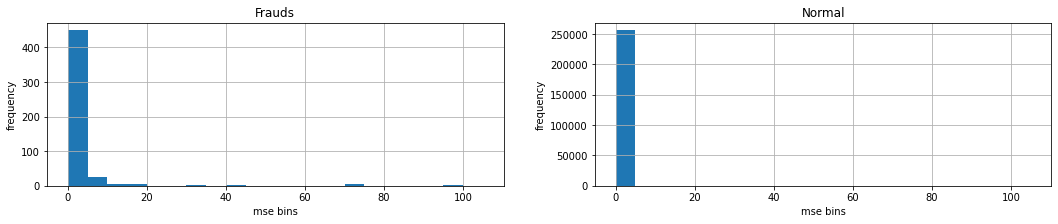

In [ ]:
# Plot distribution of reconstruction errors
plt.figure(figsize=(18, 3))

plt.subplot(1, 2, 1)
plt.title('Frauds')
plt.hist(mse_frauds, bins=range(0, 110, 5))
plt.xlabel('mse bins')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Normal')
plt.hist(mse_train, bins=range(0, 110, 5))
plt.xlabel('mse bins')
plt.ylabel('frequency')
plt.grid()

plt.show()

# Part 4: Latent space

In [ ]:
# Create a submodel using only the encoder part of previous model (output must be latent layer)
encoder_model = Model(inputs=in_layer, outputs=latent)
encoder_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              30720     
                                                                 
 latent (Dense)              (None, 16)                16400     
                                                                 
Total params: 47,120
Trainable params: 47,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predict a latent representation for the test set and the frauds set
latent_normal = encoder_model.predict(x_test)
latent_frauds = encoder_model.predict(frauds)

print(latent_normal.shape)
print(latent_frauds.shape)

16/16 [==============================] - 0s 1ms/step
(28432, 16)
(492, 16)


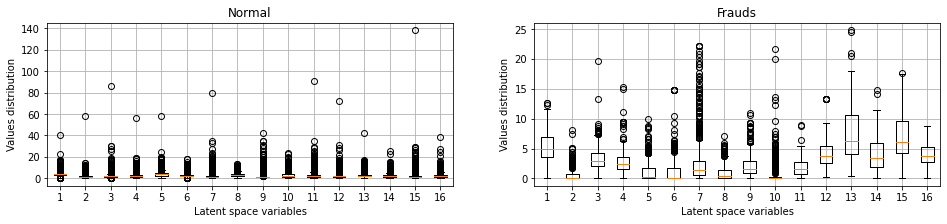

In [ ]:
# Plot distribution of latent space
plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)
plt.title('Normal')
plt.boxplot(latent_normal)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Frauds')
plt.boxplot(latent_frauds)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()

plt.show()

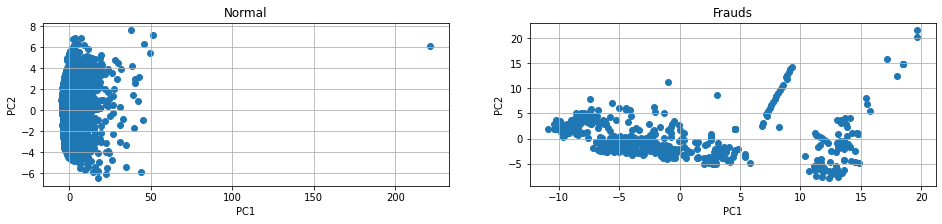

In [ ]:
from sklearn.decomposition import PCA

pc_transform_n = PCA(n_components=2).fit(latent_normal)
latent_normal_pc = pc_transform_n.transform(latent_normal)

pc_transform_f = PCA(n_components=2).fit(latent_frauds)
latent_frauds_pc = pc_transform_f.transform(latent_frauds)

plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)
plt.title('Normal')
plt.scatter(latent_normal_pc[:, 0], latent_normal_pc[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Frauds')
plt.scatter(latent_frauds_pc[:, 0], latent_frauds_pc[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

plt.show()

In [ ]:
# We can even try with only the encoder
encoder_model = Model(inputs=in_layer, outputs=encoder)
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              30720     
                                                                 
Total params: 30,720
Trainable params: 30,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predict a latent representation for the test set and the frauds set
latent_normal = encoder_model.predict(x_test)
latent_frauds = encoder_model.predict(frauds)

print(latent_normal.shape)
print(latent_frauds.shape)

16/16 [==============================] - 0s 1ms/step
(28432, 1024)
(492, 1024)


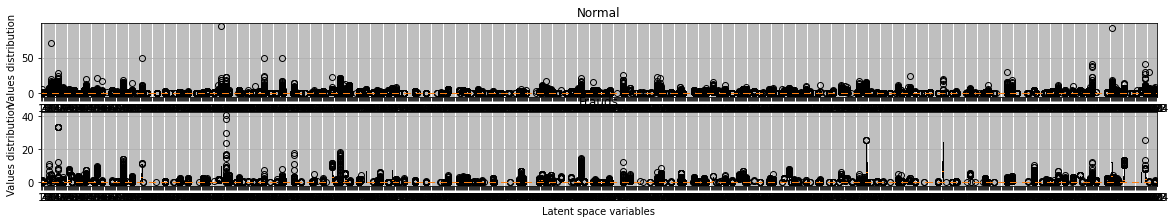

In [ ]:
# Plot distribution of latent space
plt.figure(figsize=(20, 3))

plt.subplot(2, 1, 1)
plt.title('Normal')
plt.boxplot(latent_normal)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()

plt.subplot(2, 1, 2)
plt.title('Frauds')
plt.boxplot(latent_frauds)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()

plt.show()

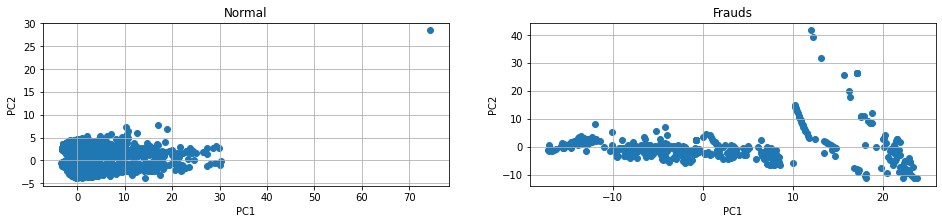

In [ ]:
# Again with PCA

pc_transform_n = PCA(n_components=2).fit(latent_normal)
latent_normal_pc = pc_transform_n.transform(latent_normal)

pc_transform_f = PCA(n_components=2).fit(latent_frauds)
latent_frauds_pc = pc_transform_f.transform(latent_frauds)

plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)
plt.title('Normal')
plt.scatter(latent_normal_pc[:, 0], latent_normal_pc[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Frauds')
plt.scatter(latent_frauds_pc[:, 0], latent_frauds_pc[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

plt.show()

In [ ]:
# == Q ==
# 1. Diseña un AE que obtenga pérdida menor o igual 0.01 tanto en entrenamiento como validación.
#    Reporta tu arquitectura.
# 2. ¿Existe alguna relación entre la profundidad del AE y la pérdida final?
# 3. ¿Existe alguna relación entre la profundidad del AE y la separación resultante
#    entre los espacios latentes de los datos normales y anormales?
# 4. ¿Existe alguna relación entre el número elementos en el espacio latente y la pérdida final?
# 5. ¿Existe alguna relación entre el número elementos en el espacio latente y la separación resultante
#    entre los espacios latentes de los datos normales y anormales?
# 6. Intenta forzar el espacio latente para que sea ralo. Reporta tu mejor modelo y 
#    el desempeño que obtenga, tanto en pérdida como en capacidad de diferenciar datos anormales.